# Well Log Analyzer

## 1.0 - SAM - Exploratory Data Analysis

Notebook intended to explore relevant features in the dataset.    
*Dataset:* 15/9-F-11 B  
*Provider:* Statoil Petroleum AS

### Data ingestion

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#Excel file uploading
relative_path_to_excel_file = '../data/raw/15_9-F-11 B.xlsx'
complete_excel_file = pd.read_excel(relative_path_to_excel_file)

In [3]:
#Extracting relevant data from file
metadata = complete_excel_file.iloc[0:63,:]

data_headers = pd.Series(["{} ({})".format(measurement,units) for measurement,units in zip(complete_excel_file.iloc[65], complete_excel_file.iloc[66])])

data = complete_excel_file.iloc[67:,:]

data.columns = data_headers
data.index = [i for i in range(data.shape[0])]



### Data Overview

In [4]:
#Verify dimensions of metadata
metadata.shape

(63, 20)

In [5]:
#Verify dimensions of data
data.shape

(45818, 20)

In [6]:
#Data overview
data.head(10)

,#Depth (#M),ABDCQF01 (g/cm3),ABDCQF02 (g/cm3),ABDCQF03 (g/cm3),ABDCQF04 (g/cm3),BS (inches),CALI (inches),DRHO (g/cm3),GR (API),NPHI (v/v),PEF (b/elec),RACEHM (ohm.m),RACELM (ohm.m),RD (ohm.m),RHOB (g/cm3),RM (ohm.m),ROP (m/hr),RPCEHM (ohm.m),RPCELM (ohm.m),RT (ohm.m)
0,188.5,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,4.3,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,188.6,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,3.801,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,188.7,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,4.301,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,188.8,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,4.6,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,188.9,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,4.599,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
5,189,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,4.299,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
6,189.1,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,3.801,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
7,189.2,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,4.101,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
8,189.3,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,4.302,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
9,189.4,-999.25,-999.25,-999.25,-999.25,36,-999.25,-999.25,5.201,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [7]:
#Data description
data.describe()

,#Depth (#M),ABDCQF01 (g/cm3),ABDCQF02 (g/cm3),ABDCQF03 (g/cm3),ABDCQF04 (g/cm3),BS (inches),CALI (inches),DRHO (g/cm3),GR (API),NPHI (v/v),PEF (b/elec),RACEHM (ohm.m),RACELM (ohm.m),RD (ohm.m),RHOB (g/cm3),RM (ohm.m),ROP (m/hr),RPCEHM (ohm.m),RPCELM (ohm.m),RT (ohm.m)
count,45818.0,45818.00,45818.00,45818.00,45818.00,45818.0,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00,45818.00
unique,45818.0,953.00,869.00,960.00,866.00,10.0,401.00,178.00,36145.00,403.00,4476.00,11794.00,10674.00,11108.00,840.00,12644.00,18407.00,12307.00,10765.00,12644.00
top,3888.1,-999.25,-999.25,-999.25,-999.25,8.5,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
freq,1.0,30623.00,30623.00,30623.00,30623.00,15843.0,30275.00,30280.00,147.00,30352.00,30326.00,24043.00,24043.00,961.00,30326.00,744.00,407.00,24043.00,24260.00,744.00


In [8]:
#Check for existing data types
data.dtypes

#Depth (#M)         object
ABDCQF01 (g/cm3)    object
ABDCQF02 (g/cm3)    object
ABDCQF03 (g/cm3)    object
ABDCQF04 (g/cm3)    object
BS (inches)         object
CALI (inches)       object
DRHO (g/cm3)        object
GR (API)            object
NPHI (v/v)          object
PEF (b/elec)        object
RACEHM (ohm.m)      object
RACELM (ohm.m)      object
RD (ohm.m)          object
RHOB (g/cm3)        object
RM (ohm.m)          object
ROP (m/hr)          object
RPCEHM (ohm.m)      object
RPCELM (ohm.m)      object
RT (ohm.m)          object
dtype: object

### Data Preparation

In [9]:
#Check for individual data type randomly
type(data.loc[5, 'GR (API)'])

float

In [10]:
#As it was informed that NaN would come as -999.25, it is good to state it in the DataFrame.
data = data.replace(-999.25, np.nan);

In [11]:
#Select only useful data

columns_of_interest = ['#Depth (#M)', 'GR (API)', 'BS (inches)', 
                       'CALI (inches)', 'RT (ohm.m)', 'RM (ohm.m)', 
                       'PEF (b/elec)', 'RHOB (g/cm3)', 'NPHI (v/v)']

data.dropna(subset=columns_of_interest);

### Visualization

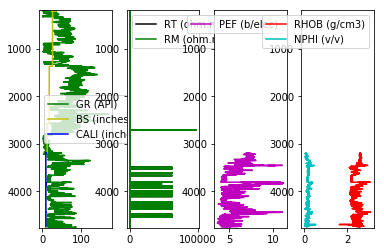

In [12]:
# Check for traces' quality

fig, ax = plt.subplots(1, 4)

ax[0].plot(data.loc[:,'GR (API)'], data['#Depth (#M)'], color='g', label='GR (API)') #Plot Gamma Ray trace
ax[0].plot(data.loc[:,'BS (inches)'], data['#Depth (#M)'], color='y', label='BS (inches)') #Plot Bit Size trace
ax[0].plot(data.loc[:,'CALI (inches)'], data['#Depth (#M)'], color='blue', label='CALI (inches)') #Plot CALI trace
#ax[0].set_xlim(min(data.loc[:,'BS (inches)'].dropna()), max(data.loc[:,'BS (inches)'].dropna()))
ax[0].set_ylim(max(data['#Depth (#M)']), min(data['#Depth (#M)']))
ax[0].legend()

ax[1].plot(data.loc[:,'RT (ohm.m)'], data['#Depth (#M)'], color='black', label='RT (ohm.m)') #Plot Total Resistivity trace
ax[1].plot(data.loc[:,'RM (ohm.m)'], data['#Depth (#M)'], color='g', label='RM (ohm.m)') #Plot Mean Resistivity trace
#ax[1].set_xlim(min(data.loc[:,'RT (ohm.m)'].dropna()), max(data.loc[:,'RT (ohm.m)'].dropna()))
ax[1].set_ylim(max(data['#Depth (#M)']), min(data['#Depth (#M)']))
ax[1].legend()

ax[2].plot(data.loc[:,'PEF (b/elec)'], data['#Depth (#M)'], color='m', label='PEF (b/elec)') #Plot Photoelectric Factor trace
#ax[2].set_xlim(min(data.loc[:,'PEF (b/elec)'].dropna()), max(data.loc[:,'PEF (b/elec)'].dropna()))
ax[2].set_ylim(max(data['#Depth (#M)']), min(data['#Depth (#M)']))
ax[2].legend()

ax[3].plot(data.loc[:,'RHOB (g/cm3)'], data['#Depth (#M)'], color='r', label='RHOB (g/cm3)') #Plot Bulk Density trace
ax[3].plot(data.loc[:,'NPHI (v/v)'], data['#Depth (#M)'], color='c', label='NPHI (v/v)'); #Plot Neutron trace
#ax[3].set_xlim(min(data.loc[:,'RHOB (g/cm3)'].dropna()), max(data.loc[:,'RHOB (g/cm3)'].dropna()))
ax[3].set_ylim(max(data['#Depth (#M)']), min(data['#Depth (#M)']))
ax[3].legend()



In [13]:
#Save data to CSV file in ../data/interim/
data.to_csv(path_or_buf='../data/interim/extracted-1.csv')